<a href="https://colab.research.google.com/github/alexontour/snippets/blob/main/snip_fhir_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Alexander Kollmann, 08/2022**

---

**Funktion**

Verbindung zu einem FHIR-Server herstellen (Firely, HAPI, etc.)

FHIR - Ressorcen schreiben und verknüpfen (versch. Möglichkeiten)

> Patient, Encounter, Observation, Condition

AddOn - GUI / Eingabemaske
---

**Referenzen**

https://colab.research.google.com/drive/1OSuqqACnCqw8h67E7DKDMyIGO1C2qbEq?usp=sharing#scrollTo=rU-lfJob3fOf

https://github.com/Alvearie/FHIR-from-Jupyter

https://pypi.org/project/fhirclient/

https://github.com/intrahealth/client-registry/blob/master/docs/notebooks/load_bulk_data_in_python.ipynb

https://github.com/CODA-19/csv-to-fhir/blob/master/demo_csv-json.py

https://github.com/Healthedata1/smart_pythonclient_example/blob/master/Argo-patient-example.ipynb

https://www.convertcsv.com/xml-to-csv.htm

---



das ist eine beschreibung


In [1]:
import json
import requests
from collections import OrderedDict
from io import StringIO

# Optional zur Darstellung einer Web-Seite
from IPython.display import IFrame

In [2]:
# Base URL zum FHIR-Server
# https://confluence.hl7.org/display/FHIR/Public+Test+Servers

url = "https://hapi.ehealth-solutions.at/fhir/"
#url = "http://hapi.fhir.org/baseR4/"
#url = 'https://server.fire.ly/'

# https://hub.docker.com/r/hapiproject/hapi
# url = "http://hapifhir4ako.duckdns.org/fhir/"

# Header definieren
headers = {"Content-Type": "application/fhir+json;charset=utf-8"}

In [3]:
# Zufalls-Wert für Namen generieren um Dubletten zu vermeiden

import random
import string

def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_letters
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

# **Patient**

https://www.hl7.org/fhir/patient.html

Demographics and other administrative information about an individual or animal receiving care or other health-related services. This Resource covers data about patients and animals involved in a wide range of health-related activities.

In [4]:

# HL7 FHIR defines a set of "resources" for exchanging information.
IFrame('https://www.hl7.org/fhir/patient.html', width=1200, height=330)

In [5]:
# JSON Formatieren und Editiern
IFrame('https://jsonformatter.org/jsbeautifier', width=1200, height=330)

In [6]:
# Option 1: JSON - Ressouce erstellen lt. Datenmodell
# json.load() takes a file object and returns the json object. It is used to read JSON encoded data from a file and convert it into a
# Python dictionary and deserialize a file itself i.e. it accepts a file object.

patient = json.loads("""{
   "resourceType":"Patient",
   "name":[
      {
         "given": "Alex",
         "family": "KO",
         "text":"FHWN HCI2025",
         "use": "official"
      }
   ],
   "gender":"male",
   "birthDate":"2012-12-12"
}""")

In [7]:
# JSON von URL laden
# url_austrian_patient = "https://raw.githubusercontent.com/alexontour/snippets/main/austrian_patient_example.json"
# patient = requests.get(url_austrian_patient).json()

# dict in json umwandeln
# patient = json.dumps(patient, indent = 2)


In [8]:
# FHIR Ressource an FHIR-Server senden (POST)
response = requests.request("POST", url + "Patient", headers=headers, data=str(patient))

# Ergebnis (Response) verarbeiten
patient_id = json.loads(response.text)['id']
patient_name = json.loads(response.text)['name']
#response.json()

print("Patient-Name: "+ str(patient_name))
print("Patient-ID: " + patient_id)
#print(patient_name[0]['given'])

Patient-Name: [{'use': 'official', 'text': 'FHWN HCI2025', 'family': 'KO', 'given': ['Alex']}]
Patient-ID: 45


In [9]:
#print(response.text)

In [10]:
# Option 2: Erzeugen der FHIR-Ressource als Python-Dictionary in eine Funktion auslagern
# Dictionaries are used to store data values in key:value pairs. A dictionary is a collection which is ordered*, changeable and do not allow duplicates.

def create_patient():

    # Random Namenszusatz für Eindeutigkeit
    rand = get_random_string(5)

    body = {
        "name":[
            {
              "given": "Fachhochschule",
              "family": "WienerNeustadt{}".format(rand),
              "text":"Fachhochschule WienerNeustadt{}".format(rand),
              "use": "official"
            }
        ],
        "birthDate":"2022-12-05",
        "gender": "female",
        "resourceType": "Patient",
    }

    io = StringIO()
    json.dump(body, io, indent=2)

    return io


In [11]:
# FHIR Ressource über Funktionsaufruf erstellen unn an FHIR-Server senden (POST)
response = requests.request("POST", url + "Patient", headers=headers, data=create_patient().getvalue())

patient_id = json.loads(response.text)['id']
patient_name = json.loads(response.text)['name']

print("Patient-Name: "+ str(patient_name))
print("Patient-ID: "+ patient_id)

Patient-Name: [{'use': 'official', 'text': 'Fachhochschule WienerNeustadtxDEqu', 'family': 'WienerNeustadtxDEqu', 'given': ['Fachhochschule']}]
Patient-ID: 46


# **Encounter**

https://www.hl7.org/fhir/encounter.html

A patient encounter is further characterized by the setting in which it takes place. Amongst them are ambulatory, emergency, home health, inpatient and virtual encounters. An Encounter encompasses the lifecycle from pre-admission, the actual encounter (for ambulatory encounters), and admission, stay and discharge (for inpatient encounters). During the encounter the patient may move from practitioner to practitioner and location to location.

In [12]:
# HL7 FHIR defines a set of "resources" for exchanging information.
IFrame('https://www.hl7.org/fhir/encounter.html', width=1200, height=330)

In [13]:
def create_encounter(patient_id):

    body = {
        "status": "finished",
        "class": {
          "system": "http://terminology.hl7.org/CodeSystem/v3-ActCode",
          "code": "AMB",
          "display": "ambulatory"
          },
        "type": [
          {
            "coding": [
              {
                "system": "http://snomed.info/sct",
                "code": "270427003",
                "display": "Patient-initiated encounter"
              }
            ]
          }
        ],
 #       "class": {
 #           "system": "http://hl7.org/fhir/v3/ActCode",
 #           "code": "IMP",
 #           "display": "inpatient encounter",
 #       },
        "reason": [
            {
                "text": "The patient had an abnormal heart rate. She was concerned about this."
            }
        ],
        "subject": {"reference": "Patient/{}".format(patient_id)},
        "text": {
          "status": "additional",
          "div": "<div>Encounter zum Patienten:{}".format(patient_name)+ "</div>"
        },
        "resourceType": "Encounter",
    }

    io = StringIO()
    json.dump(body, io, indent=2)

    return io

response = requests.request("POST", url + "Encounter", headers=headers, data=create_encounter(patient_id).getvalue())

encounter_id = json.loads(response.text)['id']
#response.json()

print("Encounter-ID: " + encounter_id)

Encounter-ID: 47


# **Observation**

https://www.hl7.org/fhir/observation.html

Measurements and simple assertions made about a patient, device or other subject. Observations are a central element in healthcare, used to support diagnosis, monitor progress, determine baselines and patterns and even capture demographic characteristics.

In [14]:
# HL7 FHIR defines a set of "resources" for exchanging information.
IFrame('https://www.hl7.org/fhir/observation.html', width=1200, height=330)

In [15]:
# die Observation referenziert auf einen Patienten und einen Encounter

def create_observation(patient_id,encounter_id):

    body = {
        "resourceType": "Observation",
        "code": {
            "coding": [
                {
                    "system": "http://loinc.org",
                    "code": "8867-4",
                    "display": "Heart rate",
                }
            ]
        },
        "status": "final",
        "subject": {"reference": "Patient/{}".format(patient_id)},
        "effectiveDateTime": "2019-01-01T00:00:00+00:00",
        "valueQuantity": {"value": 80, "unit": "bpm"},
        "context": {"reference": "Encounter/{}".format(encounter_id)},
    }

    io = StringIO()
    json.dump(body, io, indent=2)

    return io

response = requests.request("POST", url + "Observation", headers=headers, data=create_observation(patient_id,encounter_id).getvalue())

observation_id = json.loads(response.text)['id']
#response.json()

print("Observation-ID: " + observation_id)

Observation-ID: 48


# **Condition**

https://www.hl7.org/fhir/condition.html

A clinical condition, problem, diagnosis, or other event, situation, issue, or clinical concept that has risen to a level of concern. This resource is used to record detailed information about a condition, problem, diagnosis, or other event, situation, issue, or clinical concept that has risen to a level of concern.

In [16]:
# HL7 FHIR defines a set of "resources" for exchanging information.
IFrame('https://www.hl7.org/fhir/condition.html', width=1200, height=330)

In [17]:
# Option 3: FHIR-Ressource über Orderd-Dictionary erstellen
# An OrderedDict is a dictionary subclass that remembers the order that keys were first inserted.
# A regular dict doesn’t track the insertion order and iterating it gives the values in an arbitrary order. By contrast, the order the items are inserted is remembered by OrderedDict.

cond = OrderedDict()
cond['resourceType'] = 'Condition'
#cond['id'] = 'example'
cond['subject'] = {"reference": "Patient/{}".format(patient_id)}
cond['encounter'] = {'reference': 'Encounter/{}'.format(encounter_id)}
cond['dateRecorded'] = '2021-04-01T13:00'
cond['code'] = {'coding':
                       [{'system': 'http://hl7.org/fhir/sid/icd-10-us',
                         'code': 'E10.65',
                         'display': 'Type 1 Diabetes Mellitus with Hyperglycemia'}]}
cond['clinicalStatus'] = "active"
cond['verificationStatus'] = 'provisional'

io = StringIO()
json.dump(cond, io, indent=2)
#print(io.getvalue())

response = requests.request("POST", url + "Condition", headers=headers, data=io.getvalue())

condition_id = json.loads(response.text)['id']
#response.json()

print("Condition-ID: " + condition_id)

Condition-ID: 49


# Ergebnis
Es wurde ein Patient*in mit einem ambulanten Fall (Encounter), einer HR-Messung (Observation) und einer Diagnose (Condition) auf einem FHIR-Server (url) angelegt. Die dazugehörigen IDs sind wie folgt:

In [18]:
print("Patient-Name: " + str(patient_name))
print("Patient-ID: " + patient_id)
print("Encounter-ID: " + encounter_id)
print("Condition-ID: " + condition_id)
print("Observation-ID: " + observation_id)

Patient-Name: [{'use': 'official', 'text': 'Fachhochschule WienerNeustadtxDEqu', 'family': 'WienerNeustadtxDEqu', 'given': ['Fachhochschule']}]
Patient-ID: 46
Encounter-ID: 47
Condition-ID: 49
Observation-ID: 48


Ergebnis abrufbar unter: http://clinfhir.com/patientViewer.html (Server-URL zuerst konfigurieren z.B. http://hapi.fhir.org/baseR4/)

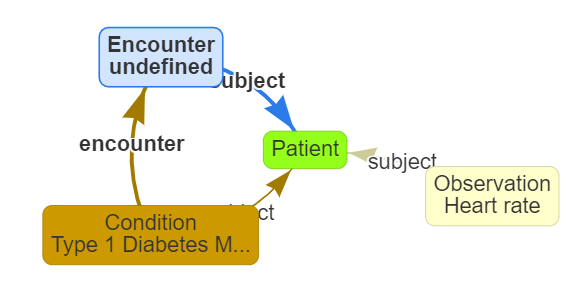

Modellierung eines gesamten UseCases - siehe auch: http://gb2.clinfhir.com/

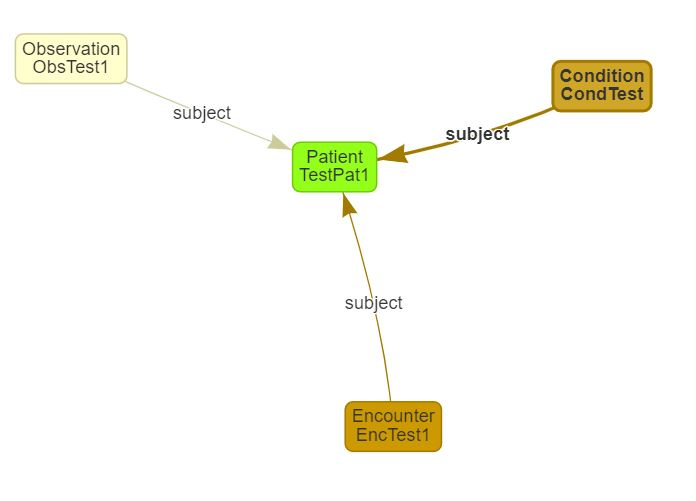

# AddOn -  GUI /Eingabemaske

## Code von ChatGPT programmiert

In [19]:
!pip install fhir.resources

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 733.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.1 MB/s eta 0:00:00


In [20]:
import ipywidgets as widgets
from IPython.display import display
import requests

# Erstelle die Eingabemasken für Vorname, Nachname, Geschlecht und Geburtsdatum
vorname_input = widgets.Text(
    value='',
    placeholder='Vorname eingeben',
    description='Vorname:',
    disabled=False
)

nachname_input = widgets.Text(
    value='',
    placeholder='Nachname eingeben',
    description='Nachname:',
    disabled=False
)

geschlecht_input = widgets.Dropdown(
    options=['male', 'female'],
    value='male',
    description='Geschlecht:'
)

geburtsdatum_input = widgets.DatePicker(
    description='Geburtsdatum:'
)

# Zeige die Eingabemasken an
display(vorname_input)
display(nachname_input)
display(geschlecht_input)
display(geburtsdatum_input)

# Erstelle eine Funktion, um die Daten an den FHIR-Server zu senden
def send_data_to_fhir_server(_):
    vorname = vorname_input.value
    nachname = nachname_input.value
    geschlecht = geschlecht_input.value
    geburtsdatum = geburtsdatum_input.value.strftime('%Y-%m-%d') if geburtsdatum_input.value else None

    # Erstelle das FHIR-Patientenobjekt
    patient_data = {
        'resourceType': 'Patient',
        'name': [
            {
                'given': [vorname],
                'family': nachname
            }
        ],
        'gender': geschlecht,
        'birthDate': geburtsdatum
    }

    # Sende die Daten an den FHIR-Server
    fhir_server_url = url
    #response = requests.post(fhir_server_url, json=patient_data, headers={'Content-Type': 'application/json'})

    url_f = "http://hapi.fhir.org/baseR4/"

    response = requests.request("POST", url_f + "Patient", headers=headers, data=str(patient_data))
    patid = json.loads(response.text)['id']

    if response.status_code == 201:
        print("Daten erfolgreich an den FHIR-Server gesendet.")
        print("PatID: " + patid)
    else:
        print("Fehler beim Senden der Daten an den FHIR-Server:", response.status_code)
        print("Fehlermeldung:", response.text)


# Erstelle einen Button, um die Daten zu senden
send_button = widgets.Button(description="Daten an FHIR-Server senden")
send_button.on_click(send_data_to_fhir_server)
display(send_button)

Text(value='', description='Vorname:', placeholder='Vorname eingeben')

Text(value='', description='Nachname:', placeholder='Nachname eingeben')

Dropdown(description='Geschlecht:', options=('male', 'female'), value='male')

DatePicker(value=None, description='Geburtsdatum:')

Button(description='Daten an FHIR-Server senden', style=ButtonStyle())

In [21]:
import ipywidgets as widgets
from IPython.display import display
import requests
from datetime import datetime

# Erstelle die Eingabemaske für die Blutzucker-Beobachtung
patient_id_input = widgets.Text(
    value='',
    placeholder='Patienten-ID',
    description='Patienten-ID:',
    disabled=False
)

blutzucker_input = widgets.FloatText(
    value=0.0,
    description='Blutzuckerwert:',
    disabled=False
)

# Zeige die Eingabemasken an
display(patient_id_input)
display(blutzucker_input)

# Erstelle eine Funktion, um die Blutzucker-Beobachtung an den FHIR-Server zu senden
def send_blutzucker_observation_to_fhir_server(_):
    patient_id = patient_id_input.value
    blutzucker_wert = blutzucker_input.value

    # Erstelle den aktuellen Zeitstempel im FHIR-Format
    timestamp = datetime.utcnow().isoformat()

    # Erstelle das FHIR-Observation-Objekt für den Blutzucker
    blutzucker_observation_data = {
        'resourceType': 'Observation',
        'status': 'final',
        'code': {
            'text': 'Blutzucker'
        },
        'subject': {
            'reference': f'Patient/{patient_id}'
        },
        'effectiveDateTime': timestamp,
        'valueQuantity': {
            'value': blutzucker_wert,
            'unit': 'mg/dL',
            'system': 'http://unitsofmeasure.org',
            'code': 'mg/dL'
        }
    }

    # Sende die Blutzucker-Beobachtung an den FHIR-Server
    fhir_server_url = url
    #response = requests.post(fhir_server_url, json=blutzucker_observation_data, headers={'Content-Type': 'application/json'})
    response = requests.request("POST", url + "Observation", headers=headers, data=str(blutzucker_observation_data))
    if response.status_code == 201:
        print("Blutzucker-Beobachtung erfolgreich an den FHIR-Server gesendet.")
        observation_id = json.loads(response.text)['id']
        print("Observation-ID: " + observation_id)
    else:
        print("Fehler beim Senden der Blutzucker-Beobachtung an den FHIR-Server:", response.status_code)
        print("Fehlermeldung:", response.text)

# Erstelle einen Button, um die Blutzucker-Beobachtung zu senden
send_button = widgets.Button(description="Blutzucker-Beobachtung an FHIR-Server senden")
send_button.on_click(send_blutzucker_observation_to_fhir_server)
display(send_button)


Text(value='', description='Patienten-ID:', placeholder='Patienten-ID')

FloatText(value=0.0, description='Blutzuckerwert:')

Button(description='Blutzucker-Beobachtung an FHIR-Server senden', style=ButtonStyle())

In [22]:
# Obeservation Blutzucker ergänzen

import ipywidgets as widgets
from IPython.display import display
import requests
from datetime import datetime, timezone

# Erstelle die Eingabemasken für die Observation-Daten
patient_id_input = widgets.Text(
    value='',
    placeholder='Patienten-ID',
    description='Patienten-ID:',
    disabled=False
)

blutzucker_input = widgets.FloatText(
    value=0.0,
    description='Blutzucker (mg/dL):',
    disabled=False
)

# Zeige die Eingabemasken an
display(patient_id_input)
display(blutzucker_input)

# Erstelle eine Funktion, um die Daten an den FHIR-Server zu senden
def send_blutzucker_observation_to_fhir_server(_):
    patient_id = patient_id_input.value
    blutzucker_value = blutzucker_input.value
    #timestamp = datetime.datetime.utcnow().isoformat()  # Aktueller Zeitstempel
    #timestamp = datetime.now(datetime.timezone.utc).isoformat()
    timestamp = datetime.now().isoformat()

    # Erstelle das FHIR-Observation-Objekt für Blutzucker
    observation_data = {
        'resourceType': 'Observation',
        'status': 'final',
        'code': {
            'coding': [
                {
                    'system': 'http://loinc.org',
                    'code': '15074-8',
                    'display': 'Glucose [Mass/volume] in Blood'
                }
            ],
            'text': 'Blutzucker'
        },
        'subject': {
            'reference': f'Patient/{patient_id}'
        },
        'effectiveDateTime': timestamp,
        'valueQuantity': {
            'value': blutzucker_value,
            'unit': 'mg/dL',
            'system': 'http://unitsofmeasure.org',
            'code': 'mg/dL'
        }
    }

    # Sende die Daten an den FHIR-Server und erhalte die Observation-ID
    fhir_server_url = url + "Observation"
    response = requests.post(fhir_server_url, json=observation_data, headers={'Content-Type': 'application/json'})

    if response.status_code == 201:
        observation_id = response.json().get('id')
        print("Observation erfolgreich an den FHIR-Server gesendet.")
        print(f"Observation-ID: {observation_id}")
        return observation_id
    else:
        print("Fehler beim Senden der Observation an den FHIR-Server:", response.status_code)
        print("Fehlermeldung:", response.text)
        return None

# Erstelle einen Button, um die Daten zu senden
print("Aktuelle Patient-ID: " + patient_id)
send_button = widgets.Button(description="Blutzucker-Observation an FHIR-Server senden")
send_button.on_click(send_blutzucker_observation_to_fhir_server)
display(send_button)



Text(value='', description='Patienten-ID:', placeholder='Patienten-ID')

FloatText(value=0.0, description='Blutzucker (mg/dL):')

Aktuelle Patient-ID: 46


Button(description='Blutzucker-Observation an FHIR-Server senden', style=ButtonStyle())